---
# 📐Tests on basic plots

In [1]:
## requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## input parameters
chromosome='1'
# test=False
test=True
input_dir_path='inputs'
# output_dir_path='outputs'

In [3]:
## set the current directory to 'examples'
import os
if len(set(['chrov','examples','tests']) - set(os.listdir('.')))==0:
    ## change the current directory from 'chrov' to 'examples'
    os.chdir('./examples')

In [3]:
if test:
    import logging
    logging.basicConfig(level=logging.INFO)

**Demo data**

In [4]:
# cytobands to plot the chromosome
cytobands=pd.read_table(f'{input_dir_path}/cytobands.tsv',index_col=[0])
cytobands.head(1)

,chromosome,p start,q end,start,end,cytoband,cytoband type,arm,chromosome arm
0,1,121700001,125100000,1,2300000,p36.33,gneg,p,chr1p


## Chromosome base plot

**Reference ideogram**

In [5]:
from IPython.display import Image, display
display(Image(url=f'https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Human_chromosome_{chromosome}_ideogram.svg/640px-Human_chromosome_{chromosome}_ideogram.svg.png'))

### linear layout

INFO:root:shape = (1, 9) 
INFO:root:shape = (1, 9) 


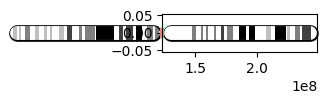

In [6]:
from chrov.viz.chrom import plot_chrom
ax=plot_chrom(
    data=cytobands.query(expr=f"`chromosome` == '{chromosome}'"),
    test=test,
    figsize=[2,0.5],
)

### polar layout

INFO:root:For curcular/polar plot, `solid_capstyle` can only be set to 'butt'. Other styles are currently not supported.
INFO:root:shape = (1, 9) 
INFO:root:For curcular/polar plot, `solid_capstyle` can only be set to 'butt'. Other styles are currently not supported.
INFO:root:shape = (1, 9) 


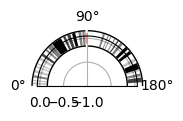

In [7]:
from chrov.viz.chrom import plot_arm

fig=plt.figure(figsize=[2,1])
ax=fig.add_axes(
    [0, 0, 1, 1], 
    polar=True,
)
ax=plot_chrom(
    data=cytobands.query(expr=f"`chromosome` == '{chromosome}'"),
    ax=ax,
    test=test,
)
_=ax.set(
    ylim=[-1,0.05]
    )

## Chromosome arm base plot

### linear layout

In [8]:
from chrov.viz.chrom import plot_arm

INFO:root:shape = (1, 9) 
INFO:root:shape = (1, 9) 


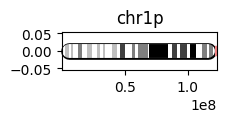

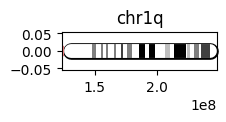

In [9]:
for arm in [f'chr{chromosome}p',f'chr{chromosome}q']:
    plot_arm(
        data=cytobands.query(expr=f"`chromosome arm` == '{arm}'"),
        test=test,
        figsize=[2,0.5],
    ).set(title=arm)

### polar layout

INFO:root:For curcular/polar plot, `solid_capstyle` can only be set to 'butt'. Other styles are currently not supported.
INFO:root:shape = (1, 9) 
INFO:root:For curcular/polar plot, `solid_capstyle` can only be set to 'butt'. Other styles are currently not supported.
INFO:root:shape = (1, 9) 


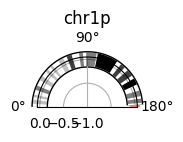

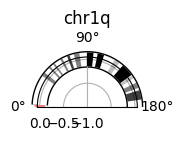

In [10]:
for arm in [f'chr{chromosome}p',f'chr{chromosome}q']:
    fig=plt.figure(figsize=[2,1])
    ax=fig.add_axes(
        [0, 0, 1, 1], 
        polar=True,
    )
    ax=plot_arm(
        data=cytobands.query(expr=f"`chromosome arm` == '{arm}'"),
        polar_smoothness_scale=1,
        ax=ax,
        test=test,
    )
    _=ax.set(
        title=arm,
        ylim=[-1,0.05],
        )

## Subplot positioning

### linear layout

INFO:root:rect=[0.125, 0.15999999999999998, 0.775, 0.5700000000000001]


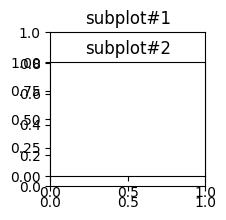

In [11]:
from chrov.viz.chrom import _add_ax
for va in ['bottom']:
    fig, ax = plt.subplots(figsize=[2,2])
    ax.set(
        zorder= -1,
        title='subplot#1',
    )
    ax2=_add_ax(
        off=-0.2,
        offy=0.05,
        va=va,
        ax_with=ax,
        )
    ax2.set(
        title='subplot#2',
    )

### polar layout

#### Concentric

INFO:root:rect=[0.2275, 0.21, 0.5700000000000001, 0.5700000000000001]


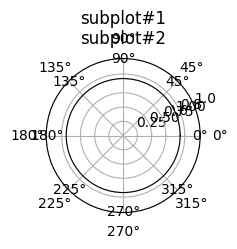

In [12]:
for va in ['center']:
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=[2,2])
    ax.set(
        zorder= -1,
        title='subplot#1',
    )
    ax2=_add_ax(
        off=-0.2,
        va=va,
        ax_with=ax,
        )
    ax2.set(
        title='subplot#2',
    )

#### Concentric with a shift

INFO:root:rect=[0.027499999999999997, 0.08499999999999999, 0.97, 0.97]


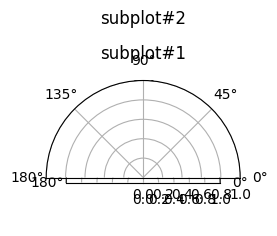

In [13]:
for va in ['center']:
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=[2,2])
    ax.set(
        zorder= -1,
        title='subplot#1',
        xlim=[0,np.pi]
    )
    ax2=_add_ax(
        off=0.2,
        offy=0.05,
        va=va,
        ax_with=ax,
        )
    ax2.set(
        title='subplot#2',
        xlim=[0,np.pi]
    )

## Text rotation

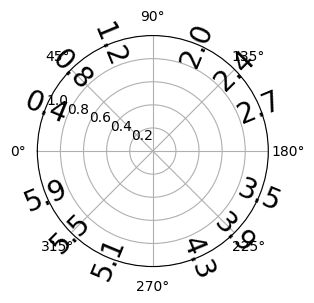

In [14]:
from chrov.viz.annot import _set_text

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'},figsize=[3,3])
ax.set_theta_zero_location('W')
ax.set_theta_direction(-1)
for i in range(4):
    angle=(np.pi/4)+(i*np.pi*0.5)
    _set_text(
        ax=ax,
        x=angle,
        y=1,
        s=f"{angle:.1f}",
        size=20,
    )
for i in range(4):
    angle=(np.pi/4*0.5)+(i*np.pi*0.5)
    _set_text(
        ax=ax,
        x=angle,
        y=1,
        s=f"{angle:.1f}",
        size=20,
    )    
for i in range(4):
    angle=(np.pi/4*1.5)+(i*np.pi*0.5)
    _set_text(
        ax=ax,
        x=angle,
        y=1,
        s=f"{angle:.1f}",
        size=20,
    )    